In [ ]:
import os

if not os.path.exists("language-detection-project"):
    !git clone https://github.com/SkopSkop/language-detection-project.git
%cd language-detection-project
 
%pip install -r requirements.txt


d:\fac\proiectDL\language-detection-project\notebooks\language-detection-project


Cloning into 'language-detection-project'...


# Language Identification 

This notebook contains the complete implementation and experimental evaluation
for a language identification system based on:

- A TF-IDF + Logistic Regression baseline
- A pretrained XLM-RoBERTa transformer
- A transformer trained from scratch
- A comparison between short and long text inputs




In [ ]:

import sys
import os

PROJECT_ROOT = os.getcwd()
sys.path.append(PROJECT_ROOT)

from src.train_transformer import *
import src.train_transformer as tt


In [2]:
# ==============================
# Experiment configuration
# ==============================

tt.RUN_BASELINE = True

tt.RUN_SANITY_CHECK = True

tt.RUN_PRETRAINED_TRAINING = False
tt.RUN_PRETRAINED_EVALUATION = True

tt.RUN_SCRATCH_TRAINING = False
tt.RUN_SCRATCH_EVALUATION = True
tt.RUN_SHORT_LONG_ANALYSIS = True

tt.SUBSET_SIZE = 5000
tt.MAX_LENGTH = 64
tt.PRETRAINED_EPOCHS = 2
tt.SCRATCH_EPOCHS = 1

In [3]:
print("Running language identification experiments...")
results = tt.main()


Running language identification experiments...
Loading dataset...
Loaded from saved CSV files
  Train samples: 70,000
  Test samples: 10,000
  Columns: ['labels', 'text']
=== DATA PREPROCESSING ===
Training data: 70,000 samples
Test data: 10,000 samples
Training samples used: 5,000
=== BASELINE MODEL EVALUATION ===

PERFORMANCE METRICS:
  Training Accuracy: 93.16%
  Test Accuracy:     90.69%
  Training F1 Score: 92.61%
  Test F1 Score:     90.56%

=== SANITY CHECK: CLEAN PRETRAINED MODEL ===


Device set to use cpu
Device set to use cpu



=== EXPERIMENT 1: PRETRAINED TRANSFORMER (EVALUATION) ===
Loading pretrained fine-tuned model from disk...
=== TRANSFORMER MODEL EVALUATION ===
Creating inference pipeline...
Pipeline created!
  Device: CPU

Sanity check on sample texts:
  Text: Hello, how are you doing today?...
    True: en | Pred: en | Conf: 99.31%
  Text: Bonjour, comment allez-vous aujourd...
    True: fr | Pred: fr | Conf: 99.84%
  Text: Hola, ¿cómo estás hoy?...
    True: es | Pred: es | Conf: 99.84%
  Text: Hallo, wie geht es dir heute?...
    True: de | Pred: de | Conf: 99.83%

Running batch inference on 10,000 samples...
  Processed 32/10000
  Processed 352/10000
  Processed 672/10000
  Processed 992/10000
  Processed 1312/10000
  Processed 1632/10000
  Processed 1952/10000
  Processed 2272/10000
  Processed 2592/10000
  Processed 2912/10000
  Processed 3232/10000
  Processed 3552/10000
  Processed 3872/10000
  Processed 4192/10000
  Processed 4512/10000
  Processed 4832/10000
  Processed 5152/10000
  Proces

Device set to use cpu



TRANSFORMER PERFORMANCE:
  Accuracy:          99.63%
  F1 Score:          99.63%
  Avg. confidence:   99.70%

=== EXPERIMENT 2: TRANSFORMER FROM SCRATCH (EVALUATION) ===
Loading scratch-trained model from disk...
=== TRANSFORMER MODEL EVALUATION ===
Creating inference pipeline...
Pipeline created!
  Device: CPU

Sanity check on sample texts:
  Text: Hello, how are you doing today?...
    True: en | Pred: it | Conf: 20.40%
  Text: Bonjour, comment allez-vous aujourd...
    True: fr | Pred: it | Conf: 20.79%
  Text: Hola, ¿cómo estás hoy?...
    True: es | Pred: zh | Conf: 20.18%
  Text: Hallo, wie geht es dir heute?...
    True: de | Pred: it | Conf: 17.18%

Running batch inference on 10,000 samples...
  Processed 32/10000
  Processed 352/10000
  Processed 672/10000
  Processed 992/10000
  Processed 1312/10000
  Processed 1632/10000
  Processed 1952/10000
  Processed 2272/10000
  Processed 2592/10000
  Processed 2912/10000
  Processed 3232/10000
  Processed 3552/10000
  Processed 3872/

Device set to use cpu



TRANSFORMER PERFORMANCE:
  Accuracy:          31.51%
  F1 Score:          25.33%
  Avg. confidence:   22.28%

=== SHORT vs LONG TEXT ANALYSIS (PRETRAINED) ===

[Short texts]
=== TRANSFORMER MODEL EVALUATION ===
Creating inference pipeline...
Pipeline created!
  Device: CPU

Sanity check on sample texts:
  Text: Hello, how are you doing today?...
    True: en | Pred: en | Conf: 99.31%
  Text: Bonjour, comment allez-vous aujourd...
    True: fr | Pred: fr | Conf: 99.84%
  Text: Hola, ¿cómo estás hoy?...
    True: es | Pred: es | Conf: 99.84%
  Text: Hallo, wie geht es dir heute?...
    True: de | Pred: de | Conf: 99.83%

Running batch inference on 2,536 samples...
  Processed 32/2536
  Processed 352/2536
  Processed 672/2536
  Processed 992/2536
  Processed 1312/2536
  Processed 1632/2536
  Processed 1952/2536
  Processed 2272/2536


Device set to use cpu



TRANSFORMER PERFORMANCE:
  Accuracy:          99.29%
  F1 Score:          99.29%
  Avg. confidence:   99.58%

[Long texts]
=== TRANSFORMER MODEL EVALUATION ===
Creating inference pipeline...
Pipeline created!
  Device: CPU

Sanity check on sample texts:
  Text: Hello, how are you doing today?...
    True: en | Pred: en | Conf: 99.31%
  Text: Bonjour, comment allez-vous aujourd...
    True: fr | Pred: fr | Conf: 99.84%
  Text: Hola, ¿cómo estás hoy?...
    True: es | Pred: es | Conf: 99.84%
  Text: Hallo, wie geht es dir heute?...
    True: de | Pred: de | Conf: 99.83%

Running batch inference on 2,082 samples...
  Processed 32/2082
  Processed 352/2082
  Processed 672/2082
  Processed 992/2082
  Processed 1312/2082
  Processed 1632/2082
  Processed 1952/2082

TRANSFORMER PERFORMANCE:
  Accuracy:          99.76%
  F1 Score:          99.76%
  Avg. confidence:   99.72%

=== FINAL MODEL COMPARISON ===
Baseline accuracy:           90.69%
Pretrained transformer:      99.63%
Transformer (fro

In [4]:
import pandas as pd

rows = []

if "baseline" in results and results["baseline"]["accuracy"] is not None:
    rows.append({
        "Model": "TF-IDF + Logistic Regression",
        "Accuracy": results["baseline"]["accuracy"],
        "F1 Score": results["baseline"]["f1"]
    })

if "pretrained" in results:
    rows.append({
        "Model": "Pretrained XLM-RoBERTa",
        "Accuracy": results["pretrained"]["accuracy"],
        "F1 Score": results["pretrained"]["f1"]
    })

if "scratch" in results:
    rows.append({
        "Model": "Transformer (From Scratch)",
        "Accuracy": results["scratch"]["accuracy"],
        "F1 Score": results["scratch"]["f1"]
    })

if not rows:
    raise RuntimeError("No experiment results available. Check configuration flags.")

results_df = pd.DataFrame(rows)
results_df


,Model,Accuracy,F1 Score
0,Pretrained XLM-RoBERTa,0.9963,0.996300
1,Transformer (From Scratch),0.3151,0.253298


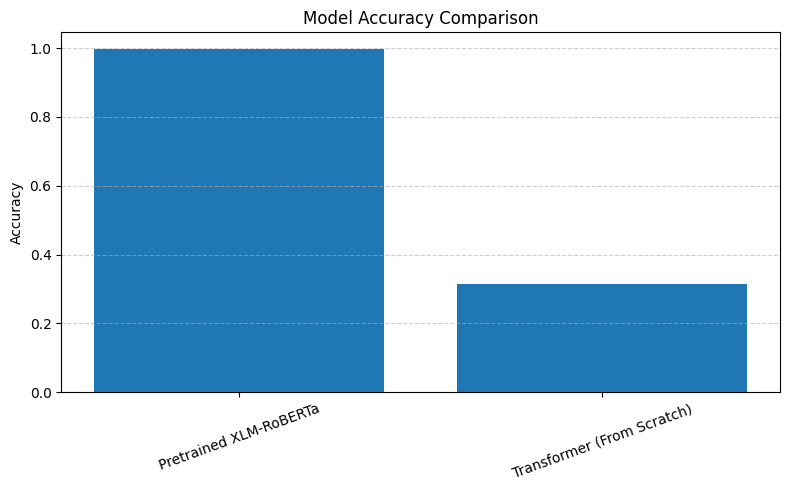

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

if "short_long" not in results:
    raise RuntimeError("Short vs Long results not found. Enable RUN_SHORT_LONG_ANALYSIS.")

length_results = pd.DataFrame({
    "Text Length": ["Short Texts", "Long Texts"],
    "Accuracy": [
        results["short_long"]["short"]["accuracy"],
        results["short_long"]["long"]["accuracy"]
    ]
})

length_results


,Text Length,Accuracy
0,Short Texts,0.992902
1,Long Texts,0.997598


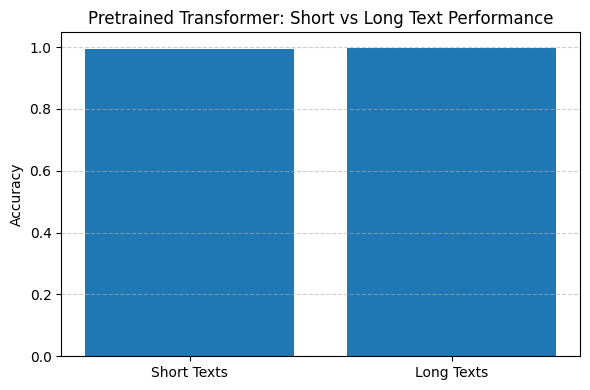

In [7]:
plt.figure(figsize=(6, 4))
plt.bar(length_results["Text Length"], length_results["Accuracy"])
plt.ylabel("Accuracy")
plt.title("Pretrained Transformer: Short vs Long Text Performance")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


## Results Summary

- The pretrained transformer performs better than baseline
- Training from scratch results in bad performance
- Long texts have higher accuracy than short ones (~0.5%)


## Steps to reproduce

- All models were trained on CPU.
- Dataset: papluca/language-identification (Hugging Face)
- Random seed fixed where applicable (42).
- Reduced dataset size used for scratch training due to computational constraints.
